# Tool to extract usefull information from mlperf trace

In [26]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [27]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [28]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [29]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,3.840000e+03,2560.000000,1280.0,1.280000e+03,1280.000000
mean,3.194012e+07,24801.599792,0.0,4.955345e+07,0.049553
std,1.834642e+07,25185.096385,0.0,6.221536e+06,0.006222
min,2.312605e+05,4.659000,0.0,4.387629e+07,0.043876
25%,1.601464e+07,8.156000,0.0,4.732034e+07,0.047320
50%,3.194788e+07,21977.807500,0.0,4.831818e+07,0.048318
75%,4.783198e+07,48357.755750,0.0,4.951523e+07,0.049515
max,6.372146e+07,95036.785000,0.0,9.501151e+07,0.095012


In [30]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [31]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,2.312605e+05,Sample,NaN,0.0,50276876.0,0.050277
2,2.312618e+05,IssueQuery,50320.616,NaN,NaN,NaN
1,2.815387e+05,QuerySamplesComplete,10.978,NaN,NaN,NaN
3,2.815866e+05,Sample,NaN,0.0,48073899.0,0.048074
5,2.815883e+05,IssueQuery,48113.369,NaN,NaN,NaN
...,...,...,...,...,...,...
3836,6.362483e+07,IssueQuery,48942.508,NaN,NaN,NaN
3835,6.367375e+07,QuerySamplesComplete,5.753,NaN,NaN,NaN
3837,6.367378e+07,Sample,NaN,0.0,47677053.0,0.047677
3839,6.367378e+07,IssueQuery,47718.919,NaN,NaN,NaN


In [32]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,2.312605e+05,Sample,NaN,0.0,50276876.0,0.050277
3,2.815866e+05,Sample,NaN,0.0,48073899.0,0.048074
6,3.297062e+05,Sample,NaN,0.0,56409774.0,0.056410
9,3.861599e+05,Sample,NaN,0.0,50103404.0,0.050103
12,4.363386e+05,Sample,NaN,0.0,52100568.0,0.052101
...,...,...,...,...,...,...
3825,6.347956e+07,Sample,NaN,0.0,48220046.0,0.048220
3828,6.352783e+07,Sample,NaN,0.0,48474303.0,0.048474
3831,6.357636e+07,Sample,NaN,0.0,48424596.0,0.048425
3834,6.362483e+07,Sample,NaN,0.0,48916866.0,0.048917


In [33]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
2,2.312618e+05,IssueQuery,50320.616,NaN,NaN,NaN
5,2.815883e+05,IssueQuery,48113.369,NaN,NaN,NaN
8,3.297081e+05,IssueQuery,56447.295,NaN,NaN,NaN
11,3.861620e+05,IssueQuery,50171.691,NaN,NaN,NaN
14,4.363408e+05,IssueQuery,52141.111,NaN,NaN,NaN
...,...,...,...,...,...,...
3827,6.347956e+07,IssueQuery,48262.066,NaN,NaN,NaN
3830,6.352783e+07,IssueQuery,48518.449,NaN,NaN,NaN
3833,6.357636e+07,IssueQuery,48466.673,NaN,NaN,NaN
3836,6.362483e+07,IssueQuery,48942.508,NaN,NaN,NaN


In [34]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [35]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
1,2.815387e+05,QuerySamplesComplete,10.978,NaN,NaN,NaN
4,3.296619e+05,QuerySamplesComplete,8.057,NaN,NaN,NaN
7,3.861175e+05,QuerySamplesComplete,7.551,NaN,NaN,NaN
10,4.362879e+05,QuerySamplesComplete,8.770,NaN,NaN,NaN
13,4.884407e+05,QuerySamplesComplete,7.997,NaN,NaN,NaN
...,...,...,...,...,...,...
3826,6.352778e+07,QuerySamplesComplete,8.143,NaN,NaN,NaN
3829,6.357631e+07,QuerySamplesComplete,9.137,NaN,NaN,NaN
3832,6.362478e+07,QuerySamplesComplete,8.203,NaN,NaN,NaN
3835,6.367375e+07,QuerySamplesComplete,5.753,NaN,NaN,NaN


# singlestream scenario

In [52]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"
all_files = glob.glob(path + "*ss.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,cpumemory,32,1,singlestream,1,1,25.762424,0.038750,0.037629,0.038975,0.040196,0.042352,0.065817,0.097435
1,resnet,cpumemory,32,1,singlestream,1,2,26.234692,0.038044,0.037252,0.038507,0.039399,0.041090,0.063159,0.070818
2,resnet,cpumemory,32,1,singlestream,1,3,26.294463,0.037961,0.037211,0.038385,0.039119,0.040166,0.068079,0.072084
3,resnet,cpumemory,32,1,singlestream,1,4,26.345648,0.037891,0.037175,0.038155,0.038900,0.040031,0.067596,0.072494
4,resnet,cpumemory,32,1,singlestream,1,5,26.357474,0.037870,0.037014,0.038096,0.039009,0.040706,0.069464,0.071322


In [53]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,cpumemory,32,1,singlestream,1,1,25.762424,0.038750,0.037629,0.038975,0.040196,0.042352,0.065817,0.097435
1,resnet,cpumemory,32,1,singlestream,1,2,26.234692,0.038044,0.037252,0.038507,0.039399,0.041090,0.063159,0.070818
2,resnet,cpumemory,32,1,singlestream,1,3,26.294463,0.037961,0.037211,0.038385,0.039119,0.040166,0.068079,0.072084
3,resnet,cpumemory,32,1,singlestream,1,4,26.345648,0.037891,0.037175,0.038155,0.038900,0.040031,0.067596,0.072494
4,resnet,cpumemory,32,1,singlestream,1,5,26.357474,0.037870,0.037014,0.038096,0.039009,0.040706,0.069464,0.071322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,singlestream,1,6,26.893907,0.037112,0.036549,0.037450,0.038186,0.039167,0.058053,0.070566
126,resnet,baseline,32,1,singlestream,1,7,26.826125,0.037202,0.036601,0.037584,0.038384,0.039604,0.061146,0.069941
127,resnet,baseline,32,1,singlestream,1,8,26.779596,0.037274,0.036655,0.037659,0.038538,0.039871,0.059105,0.067592
128,resnet,baseline,32,1,singlestream,1,9,26.859031,0.037161,0.036580,0.037474,0.038214,0.039276,0.061223,0.070065


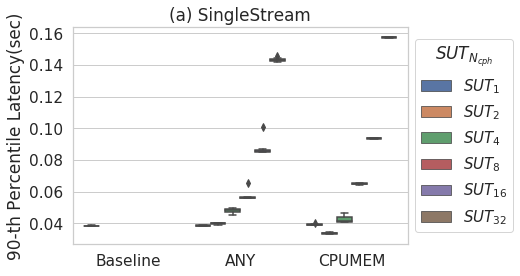

In [111]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
color=["blue","green","yellow","red","orange","grey"]

for x in ['p90']:
    for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #                          |\
    #                          (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.legend(legend,prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel("90-th Percentile Latency(sec)")
            plt.title("(a) SingleStream")
            plt.savefig('ss-metric.pdf',bbox_inches='tight')  
            plt.show()


In [114]:
df = dfg
df

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,cpumemory,32,1,singlestream,1,1,25.762424,0.038750,0.037629,0.038975,0.040196,0.042352,0.065817,0.097435
1,resnet,cpumemory,32,1,singlestream,1,2,26.234692,0.038044,0.037252,0.038507,0.039399,0.041090,0.063159,0.070818
2,resnet,cpumemory,32,1,singlestream,1,3,26.294463,0.037961,0.037211,0.038385,0.039119,0.040166,0.068079,0.072084
3,resnet,cpumemory,32,1,singlestream,1,4,26.345648,0.037891,0.037175,0.038155,0.038900,0.040031,0.067596,0.072494
4,resnet,cpumemory,32,1,singlestream,1,5,26.357474,0.037870,0.037014,0.038096,0.039009,0.040706,0.069464,0.071322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,singlestream,1,6,26.893907,0.037112,0.036549,0.037450,0.038186,0.039167,0.058053,0.070566
126,resnet,baseline,32,1,singlestream,1,7,26.826125,0.037202,0.036601,0.037584,0.038384,0.039604,0.061146,0.069941
127,resnet,baseline,32,1,singlestream,1,8,26.779596,0.037274,0.036655,0.037659,0.038538,0.039871,0.059105,0.067592
128,resnet,baseline,32,1,singlestream,1,9,26.859031,0.037161,0.036580,0.037474,0.038214,0.039276,0.061223,0.070065


In [161]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch']

df_results = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for senario in df_bench.k8senv.unique():
            df_senario = df_bench[df_bench.k8senv == senario]
            df_base=df_senario[df_senario.numctn == 1]
            base=median(df_base['p90'])
            print(base)
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_median' : median(x['p90']),
                  'increment' : (median(x['p90'])-base)/base,
              })).reset_index()
            df_results.append(df_senario)

0.0391052133
0.038634776999999995
0.038525741599999996


In [162]:
df_results = pd.concat(df_results, axis=0)
df_results

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment
0,resnet,cpumemory,32,1,singlestream,1,0.039105,0.000000
1,resnet,cpumemory,32,2,singlestream,1,0.033838,-0.134684
2,resnet,cpumemory,32,4,singlestream,1,0.041830,0.069666
3,resnet,cpumemory,32,8,singlestream,1,0.065209,0.667518
4,resnet,cpumemory,32,16,singlestream,1,0.093682,1.395627
5,resnet,cpumemory,32,32,singlestream,1,0.157620,3.030669
0,resnet,none,32,1,singlestream,1,0.038635,0.000000
1,resnet,none,32,2,singlestream,1,0.040037,0.036288
2,resnet,none,32,4,singlestream,1,0.048391,0.252517
3,resnet,none,32,8,singlestream,1,0.056369,0.459025


In [163]:
 df_results.numctn.unique()

array([ 1,  2,  4,  8, 16, 32])

In [173]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch','model_time_median','increment']

df_results1 = []

for ctn in df_results.numctn.unique():
    df_senario = df_results[df_results.numctn == ctn]
    df_base=df_senario[df_senario.k8senv == 'none']
    base=float(df_base['model_time_median'])
    print(base)
    df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
          'affinity' : (float(x['model_time_median'])-base)/base,
      })).reset_index()
    df_results1.append(df_senario)

df_results1 = pd.concat(df_results1, axis=0)
df_results1

0.038634776999999995
0.04003674874999995
0.0483907007
0.05636908945
0.08573961755000001
0.14323956300000001


,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment,affinity
0,resnet,cpumemory,32,1,singlestream,1,0.039105,0.000000,0.012176
1,resnet,none,32,1,singlestream,1,0.038635,0.000000,0.000000
2,resnet,baseline,32,1,singlestream,1,0.038526,0.000000,-0.002822
0,resnet,cpumemory,32,2,singlestream,1,0.033838,-0.134684,-0.154818
1,resnet,none,32,2,singlestream,1,0.040037,0.036288,0.000000
0,resnet,cpumemory,32,4,singlestream,1,0.041830,0.069666,-0.135588
1,resnet,none,32,4,singlestream,1,0.048391,0.252517,0.000000
0,resnet,cpumemory,32,8,singlestream,1,0.065209,0.667518,0.156816
1,resnet,none,32,8,singlestream,1,0.056369,0.459025,0.000000
0,resnet,cpumemory,32,16,singlestream,1,0.093682,1.395627,0.092628


In [55]:
#y is the issue_start_ns
# df1 = df[df["name"].isin(["Sample"])]
# df1.reset_index(drop=True,inplace=True)
# ax = df1['issue_start_ns'].plot(figsize=figsize)
# ax.set(xlim=(0, 25000))
# ax.set_title('issue start time (usec)');

In [56]:
# df1['issue_start_ns'].sort_values

In [57]:
# df_time=df1['issue_start_ns'].shift()
# df_time
# df_time.dtype

In [58]:
#time poisson
# ax = df_time.plot(figsize=figsize)
# ax.set(xlim=(0, 10000))
# ax.set_title('issue start time (usec)');

In [59]:
# color=["blue","green","yellow","red","orange","grey"]
# x=0
# for add in ['none-resnet-1-32-S-1-10','none-resnet-2-32-S-1-10'
#             ,'none-resnet-4-32-S-1-10',
#            'none-resnet-8-32-S-1-10','none-resnet-16-32-S-1-10','none-resnet-32-32-S-1-10']:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(max(df1['dur']))
# #     df1['delta'] = df1['ts'].diff()
# #     plt.hist(df1['dur'], 50, density=True, facecolor='g', alpha=0.75)
#     ax = df1['dur'].plot.hist(bins=HIST_BINS, alpha=0.5, figsize=figsize, fc=color[x])
#     ax.set_title('IssueQuery duration (usec)');
#     x = x+1
#     plt.show()

In [60]:
# df1 = df[df["name"].isin(["IssueQuery"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# print(max(df1['dur']))
# ax.set_title('IssueQuery duration (usec)');
# # ax.set(xlim=(0, 80000))
# plt.show()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between IssueQuery (usec)');

# # df1['delta'].describe()

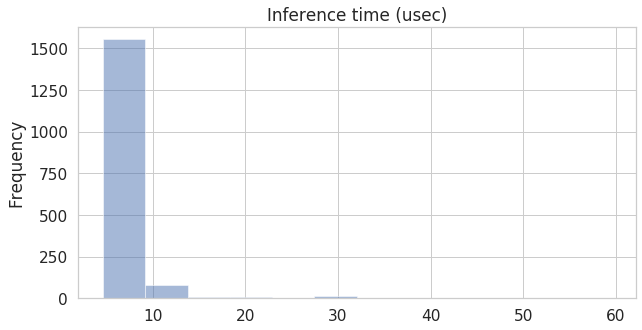

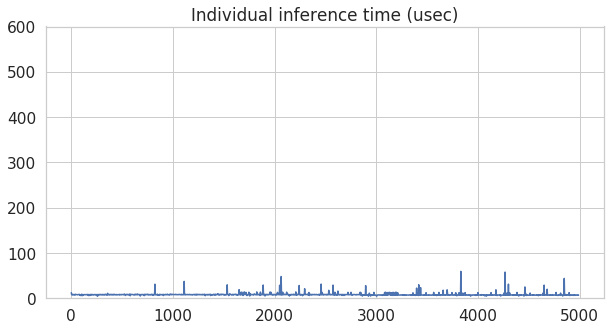

In [77]:
# for SingleStream
if True:
    df1 = df[df["name"].isin(["QuerySamplesComplete"])]
    ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    ax.set_title('Inference time (usec)');
    plt.show()
    ax = df1['dur'].plot(figsize=figsize)
    ax.set(ylim=(0, 600))
    ax.set_title('Individual inference time (usec)');

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
47.871
7.3185
7.639861437908488
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
44.594
7.205
7.56124151436032
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
46.751
7.98
8.187018575851374
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
49.473
7.922000000000001
8.214714062500004
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-16-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
122.

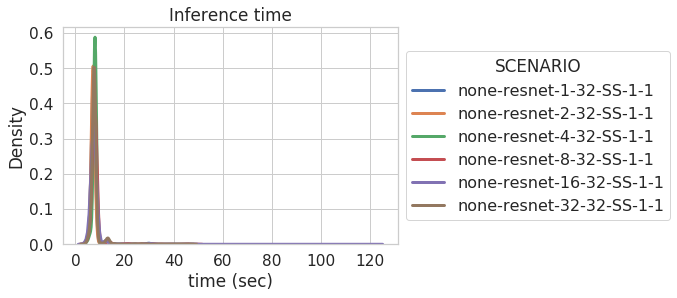

cpumem


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumem-resnet-1-32-SS-1-1/mlperf_log_trace.json'

In [21]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]

for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-1',
          sc+'-resnet-2-32-SS-1-1',
             sc+'-resnet-4-32-SS-1-1',
               sc+'-resnet-8-32-SS-1-1',
          sc+'-resnet-16-32-SS-1-1',
          sc+'-resnet-32-32-SS-1-1']
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(max(df1['dur']))
        print(np.median(df1['dur']))
        print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['dur'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time')
    plt.xlabel('time (sec)')
    plt.ylabel('Density')
    plt.show()

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-8-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resn

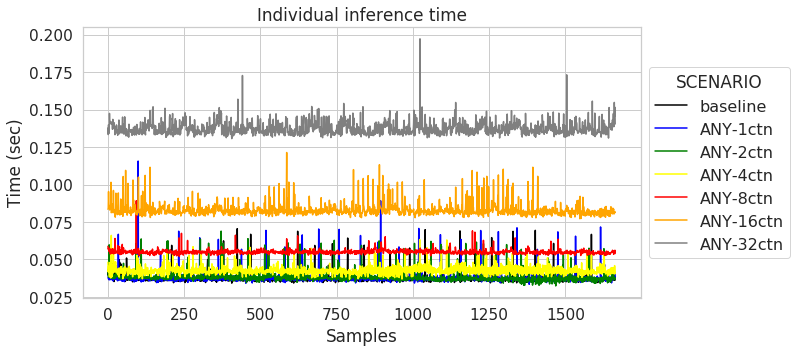

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-1-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-2-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1934
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-4-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-8-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1664
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and

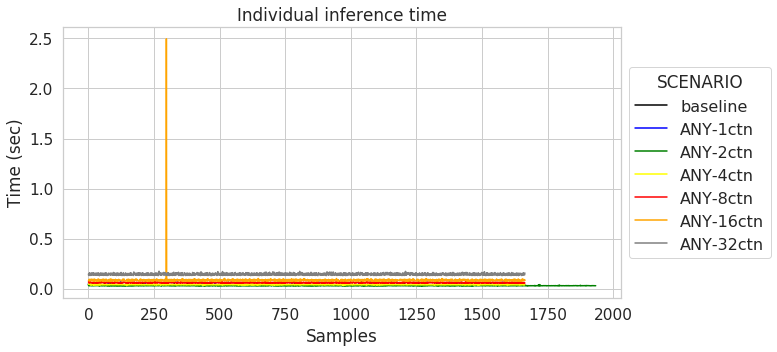

In [67]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=["baseline","ANY-1ctn","ANY-2ctn","ANY-4ctn","ANY-8ctn","ANY-16ctn","ANY-32ctn"]
for sc in ['none','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-3',
          sc+'-resnet-2-32-SS-1-3',
             sc+'-resnet-4-32-SS-1-3',
               sc+'-resnet-8-32-SS-1-3',
          sc+'-resnet-16-32-SS-1-3',
          sc+'-resnet-32-32-SS-1-3']
    
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    print(len(df1))
    ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        df1.reset_index(drop=True,inplace=True)
        print(len(df1))
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#         ax = df1['issue_delay'].plot(figsize=figsize, color=color[x])
    #     ax.set(ylim=(0, 100))
#         ax = df1['issue_start_ns'].plot(figsize=figsize, color=color[x])
#         plt.show()
        x=x+1
    ax.set_title('Individual inference time');
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('Samples')
    plt.ylabel('Time (sec)')
    plt.savefig('ss-iit'+sc+'.pdf',bbox_inches='tight') 
    plt.show()

In [ ]:
# df1 = df[df["name"].isin(["Latency"])]
# ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Inference time (usec)');
# #ax.set(xlim=(0, 25000))
# plt.xticks(rotation=60)
# plt.show()

# ax = df1['issue_to_done'].plot(figsize=figsize)
# ax.set_title('Individual inference time (usec)');
# #ax.set(ylim=(0, 200))
# plt.show()


# # df1['issue_to_done'].describe()

In [ ]:
# df1 = df[df["name"].isin(["QuerySamplesComplete"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between QuerySamplesComplete (usec)');
# plt.show()

# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time QuerySamplesComplete (usec)');

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-8-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-16-32-SS-1-3/mlperf_lo

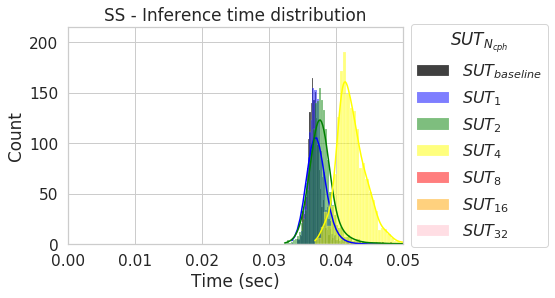

In [109]:
BINS=20
color=["black","blue","green","yellow","red","orange","pink"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for sc in ['none']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-3',
          sc+'-resnet-2-32-SS-1-3',
             sc+'-resnet-4-32-SS-1-3',
               sc+'-resnet-8-32-SS-1-3',
          sc+'-resnet-16-32-SS-1-3',
          sc+'-resnet-32-32-SS-1-3']
    
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
#     df1.reset_index(drop=True,inplace=True)
    sns.histplot(df1['issue_to_done'],
#                 hist = False, kde = True, kde=True, stat = "probability",
#                      kde_kws = {'linewidth': 3},
                     label = legend[x],color=color[x])
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1

    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        ax = sns.histplot(df1['issue_to_done'],  kde=True,
#                          hist = False, kde = True,stat = "probability",
#                      kde_kws = {'linewidth': 3},
                     label = legend[x],color=color[x])
        x=x+1

    # Plot formatting
    ax.set(xlim=(0, 0.05))
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('SS - Inference time distribution')
    plt.xlabel('Time (sec)')
    plt.ylabel('Count')
    plt.savefig('ss-itdnone.pdf',bbox_inches='tight')  
    plt.show()

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-1-32-SS-1-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-2-32-SS-1-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-4-32-SS-1-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-8-32-SS-1-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory

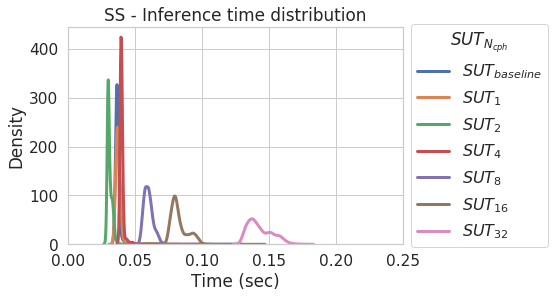

In [76]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for sc in ['cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-2',
          sc+'-resnet-2-32-SS-1-2',
             sc+'-resnet-4-32-SS-1-2',
               sc+'-resnet-8-32-SS-1-2',
          sc+'-resnet-16-32-SS-1-2',
          sc+'-resnet-32-32-SS-1-2']
    
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
#     df1.reset_index(drop=True,inplace=True)
    sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = legend[x])
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1

    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        ax = sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = legend[x])
        x=x+1

    # Plot formatting
    ax.set(xlim=(0, 0.25))
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('SS - Inference time distribution')
    plt.xlabel('Time (sec)')
    plt.ylabel('Count')
    plt.savefig('ss-itdcpumem.pdf',bbox_inches='tight')  
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-SS-1-3/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-SS-1-3/mlperf_log_trace.json'

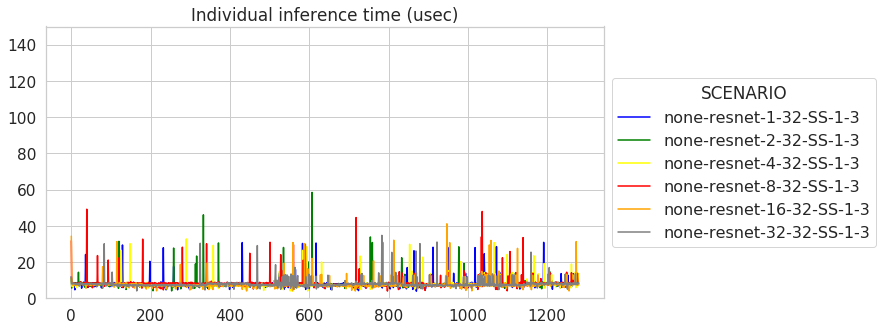

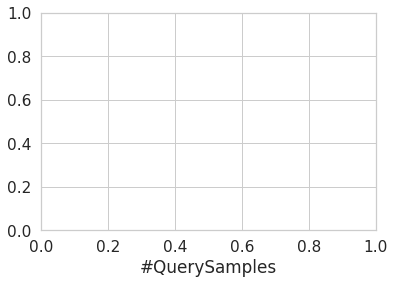

In [47]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['1']:
    SCEN=[
        'none-resnet-1-32-SS-'+batch+'-3',
          'none-resnet-2-32-SS-'+batch+'-3',
                'none-resnet-4-32-SS-'+batch+'-3',
               'none-resnet-8-32-SS-'+batch+'-3',
          'none-resnet-16-32-SS-'+batch+'-3',
          'none-resnet-32-32-SS-'+batch+'-3'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
        ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-SS

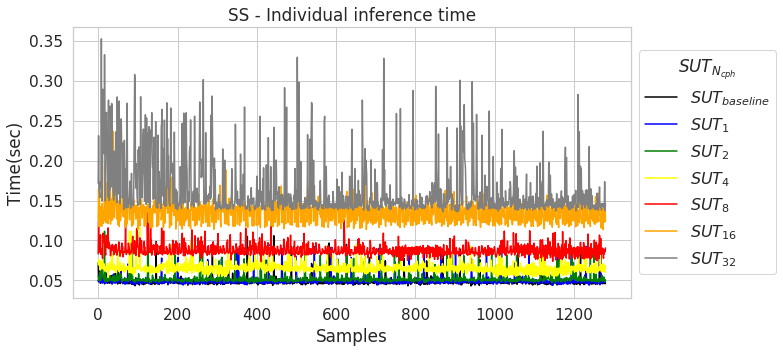

In [96]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for batch in ['1']:
    SCEN=[
        'none-resnet-1-32-SS-'+batch+'-1',
          'none-resnet-2-32-SS-'+batch+'-1',
                'none-resnet-4-32-SS-'+batch+'-1',
               'none-resnet-8-32-SS-'+batch+'-1',
          'none-resnet-16-32-SS-'+batch+'-1',
          'none-resnet-32-32-SS-'+batch+'-1'
    ]
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
        ax.set_title('SS - Individual inference time');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('Samples')
    plt.ylabel('Time(sec)')
    plt.savefig('ss-iit.pdf',bbox_inches='tight')
    plt.show()
    

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1294
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/ex

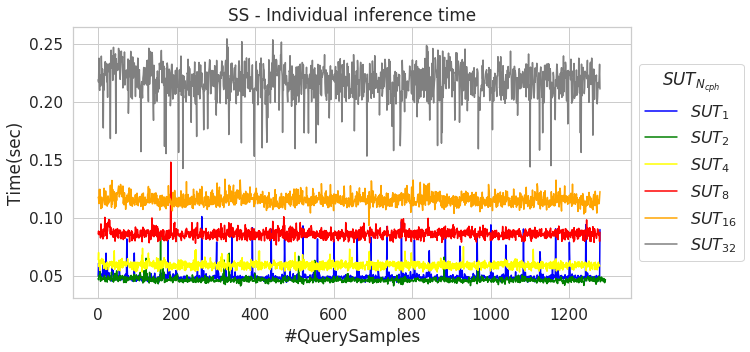

In [122]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for batch in ['1']:
    SCEN=[
        'cpumemory-resnet-1-32-SS-'+batch+'-1',
          'cpumemory-resnet-2-32-SS-'+batch+'-1',
                'cpumemory-resnet-4-32-SS-'+batch+'-1',
               'cpumemory-resnet-8-32-SS-'+batch+'-1',
          'cpumemory-resnet-16-32-SS-'+batch+'-1',
          'cpumemory-resnet-32-32-SS-'+batch+'-1'
    ]
    x=0
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["Sample"])]
#     df1.reset_index(drop=True,inplace=True)
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
# #     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#     x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
        ax.set_title('SS - Individual inference time');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('#QuerySamples')
    plt.ylabel('Time(sec)')
    plt.savefig('ss-iit-cpumem.pdf',bbox_inches='tight')
    plt.show()
    

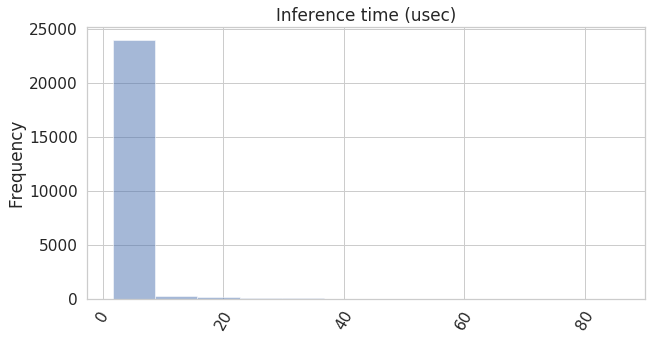

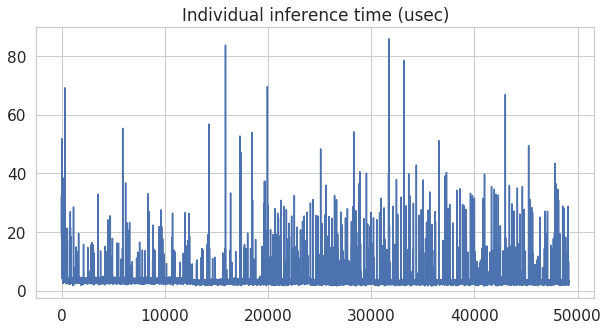

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

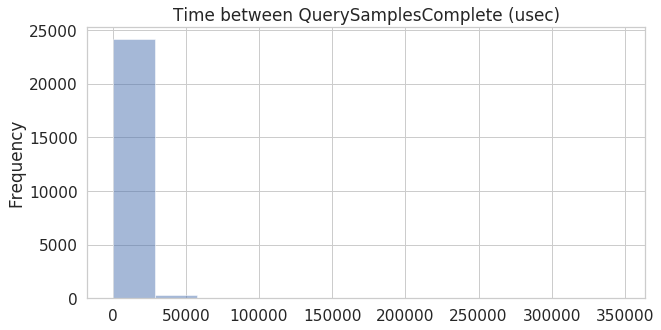

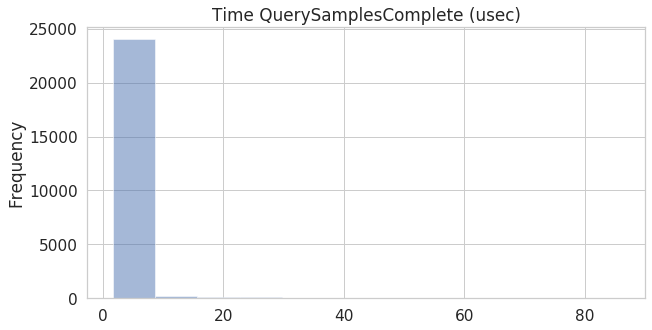

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');